# PHIRI Use case A: Vulnerable populations, inequalities and risk factors with direct and indirect impact on COVID-19 outcomes

***
### Jupyter open Notebook produced by **[PHIRI.eu](http://phiri.eu)**. Resources are available at Zenodo **[DOI](https://doi.org/10.5281/zenodo.6377096)**.
***

Research question: Has the COVID19 pandemic changed existing patterns of non-COVID-19 health care utilisation and mortality for vulnerable populations within and between countries? This is based around answering the indirect effects of the pandemic on population health.

Cohort description: Any patients 18 years old or older, with a hospital episode with a main diagnosis of any of the conditions included in the cohort definition (i.e. heart attack, stroke, hip or knee replacements, or severe trauma) from 2019-01-01 until today.

This Jupyter notebook is licensed under the **[MIT License](https://github.com/PderyckeSciensano/PHIRI/blob/main/LICENSE)**. 

## Use Case A on Vulnerable Populations ##

### LOCAL ANALYSES ###

In [ ]:
#update.packages(ask = FALSE, checkBuilt = TRUE)
options(warn=-1)

## First specify the packages of interest
packages = c("tidyverse","readr","ggplot2","dplyr","lubridate","plotly","DT","janitor")

## Now load or install&load all
package.check <- lapply(
  packages,
  FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
      install.packages(x, dependencies = TRUE)
      library(x, character.only = TRUE)
    }
  }
)

In [2]:
library(tidyverse)
library(readr)
library(ggplot2)
library(dplyr)
library(lubridate)
library(plotly)
library(DT)
library(janitor)

In [3]:
age_max <- 105
age_diff <- 5
# years to plot (1 colored line per year)
year_from <- 2017
year_to <- 2020

date_from <- as.Date(paste0(year_from,'-01-01'))
date_to <- as.Date(paste0(year_to,'-12-31'))
# today
# today_y <- as.numeric(format(Sys.Date(), "%Y"))
# today_m <- as.numeric(format(Sys.Date(), "%m"))
# today_d <- as.numeric(format(Sys.Date(), "%d"))
# today_fractionalMonth <- today_m + today_d/as.numeric( as.Date(paste(today_y,today_m+1,"01", sep="-")) - as.Date(paste(today_y,today_m,"01", sep="-")) )

print(date_from)

[1] "2017-01-01"


In [ ]:
# Import synthetic data
df <- read_delim("usecaseA_synthetic.csv", delim = "|", escape_double = FALSE, trim_ws = TRUE)

# df <- df %>% mutate(age_group = factor(cut(age_nm, seq(0, 109, 5), right = FALSE,
#                         labels = c("0-4", "5-9", "10-14", "15-19", "20-24",
#                                    "25-29", "30-34", "35-39", "40-44", "45-49",
#                                    "50-54", "55-59", "60-64", "65-69", "70-74",
#                                    "75-79", "80-84", "85-89", "90-94", "95-99",
#                                    "99+"))))

df <- df %>% mutate(age_group = cut(
pmin(age_nm, age_max-1),
seq(0, age_max, age_diff),
right = FALSE,
labels = c(
paste(seq(0,age_max-2*age_diff,age_diff), seq(age_diff-1,age_max-age_diff-1,age_diff), sep="-"),
paste(age_max-age_diff, "+", sep="")
)
))



In [5]:
head(df)

patient_id,sex,age_nm,period,acute_event_heart,date_event_heart,acute_event_stroke,date_event_stroke,ttm_type_cd,surgery_elective_hip,surgery_elective_knee,acute_event_trauma,date_event,educ_cd,socecon_lvl_cd,country_cd,district_cd,country_origin_cd,age_group
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
vdjtVcjcpFuXwVxfimSn,2,77,17,I21,2020-06-07,NA,NA,NA,NA,NA,NA,NA,2,5,GBR,UKL18,GBR,75-79
HSypTsudrGkmdpJJZKSp,2,70,22,I21,2021-08-25,NA,NA,NA,NA,NA,NA,NA,5,1,GBR,UKI32,GBR,70-74
qdNdDuvBkHKodIECXxSE,1,87,49,NA,NA,NA,NA,NA,NA,NA,S272,2021-05-01,1,2,GBR,UKL18,GBR,85-89
oWmhzRpIHcrqlbRvnGgc,2,45,40,NA,NA,I64,2020-06-17,NA,NA,NA,NA,NA,2,3,GBR,UKL18,GBR,45-49
DNqJgEOkhePkIdiyCIOT,2,71,36,I21,2022-02-09,NA,NA,NA,NA,NA,NA,NA,1,2,GBR,UKL18,GBR,70-74
kWUBINCefUfeWTmsubqt,1,36,37,NA,NA,I62,2022-11-04,NA,NA,NA,NA,NA,1,5,GBR,UKI32,GBR,35-39


In [6]:
cohort1 <- df %>% filter(!is.na(date_event_heart) | !is.na(date_event_stroke) )
cohort2 <- df %>% filter(!is.na(ttm_type_cd) , (!is.na(surgery_elective_hip) | !is.na(surgery_elective_knee)))
cohort3 <- df %>% filter(!is.na(date_event) , !is.na(acute_event_trauma))

In [7]:
head(cohort1)

patient_id,sex,age_nm,period,acute_event_heart,date_event_heart,acute_event_stroke,date_event_stroke,ttm_type_cd,surgery_elective_hip,surgery_elective_knee,acute_event_trauma,date_event,educ_cd,socecon_lvl_cd,country_cd,district_cd,country_origin_cd,age_group
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<date>,<dbl>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
vdjtVcjcpFuXwVxfimSn,2,77,17,I21,2020-06-07,NA,NA,NA,NA,NA,NA,NA,2,5,GBR,UKL18,GBR,75-79
HSypTsudrGkmdpJJZKSp,2,70,22,I21,2021-08-25,NA,NA,NA,NA,NA,NA,NA,5,1,GBR,UKI32,GBR,70-74
oWmhzRpIHcrqlbRvnGgc,2,45,40,NA,NA,I64,2020-06-17,NA,NA,NA,NA,NA,2,3,GBR,UKL18,GBR,45-49
DNqJgEOkhePkIdiyCIOT,2,71,36,I21,2022-02-09,NA,NA,NA,NA,NA,NA,NA,1,2,GBR,UKL18,GBR,70-74
kWUBINCefUfeWTmsubqt,1,36,37,NA,NA,I62,2022-11-04,NA,NA,NA,NA,NA,1,5,GBR,UKI32,GBR,35-39
STmTVuXPbgHjcwuCxOjl,1,83,39,NA,NA,I60,2021-06-18,NA,NA,NA,NA,NA,4,4,GBR,UKM61,GBR,80-84


In [8]:
year_months <- data.frame(
month=rep(1:12, year_to-year_from+1),
year= rep(year_from:year_to,each=12))

In [9]:
stroke_per_month_year <- cohort1 %>%
mutate(month = month(date_event_stroke), year = year(date_event_stroke)) %>% dplyr::select(year,month,patient_id) %>%
aggregate(.,by=list(.$year, .$month), FUN=length) %>%
transmute("year" = Group.1, "month" = Group.2, total_stroke = patient_id)

stroke_per_month_year <- merge(year_months, stroke_per_month_year, by=c("year","month"),all.x = TRUE)
stroke_per_month_year[is.na(stroke_per_month_year)] <- 0

In [10]:
heart_per_month_year <- cohort1 %>%
mutate(month = month(date_event_heart), year = year(date_event_heart)) %>% dplyr::select(year,month,patient_id) %>%
aggregate(.,by=list(.$year, .$month), FUN=length) %>%
transmute("year" = Group.1, "month" = Group.2, total_heart_attack = patient_id)

heart_per_month_year <- merge(year_months, heart_per_month_year, by=c("year","month"),all.x = TRUE)
heart_per_month_year[is.na(heart_per_month_year)] <- 0

In [11]:
knee_per_month_year <- cohort2 %>% filter(!is.na(surgery_elective_knee)) %>%
mutate(month = month(date_event), year = year(date_event)) %>% dplyr::select(year,month,patient_id) %>%
aggregate(.,by=list(.$year, .$month), FUN=length) %>%
transmute("year" = Group.1, "month" = Group.2, total_knee_replacement = patient_id)

knee_per_month_year <- merge(year_months, knee_per_month_year, by=c("year","month"),all.x = TRUE)
knee_per_month_year[is.na(knee_per_month_year)] <- 0

In [12]:
hip_per_month_year <- cohort2 %>% filter(!is.na(surgery_elective_hip)) %>%
mutate(month = month(date_event), year = year(date_event)) %>% dplyr::select(year,month,patient_id) %>%
aggregate(.,by=list(.$year, .$month), FUN=length) %>%
transmute("year" = Group.1, "month" = Group.2, total_hip_replacement = patient_id)

hip_per_month_year <- merge(year_months, hip_per_month_year, by=c("year","month"),all.x = TRUE)
hip_per_month_year[is.na(hip_per_month_year)] <- 0

In [13]:
acute_trauma_per_month_year <- cohort3 %>%
mutate(month = month(date_event), year = year(date_event)) %>% dplyr::select(year,month,patient_id) %>%
aggregate(.,by=list(.$year, .$month), FUN=length) %>%
transmute("year" = Group.1, "month" = Group.2, total_acute_trauma = patient_id)

acute_trauma_per_month_year <- merge(year_months, acute_trauma_per_month_year, by=c("year","month"),all.x = TRUE)
acute_trauma_per_month_year[is.na(acute_trauma_per_month_year)] <- 0

In [14]:
summary_table <- merge(stroke_per_month_year, heart_per_month_year, by=c("year","month"),all.x = TRUE)
summary_table <- merge(summary_table, knee_per_month_year, by=c("year","month"),all.x = TRUE)
summary_table <- merge(summary_table, hip_per_month_year, by=c("year","month"),all.x = TRUE)
summary_table <- merge(summary_table, acute_trauma_per_month_year, by=c("year","month"),all.x = TRUE)
summary_table[is.na(summary_table)] <- 0

In [15]:
dataset1 <-  cohort1 %>% filter(!is.na(date_event_stroke)) %>%
mutate(month = month(date_event_stroke), year = year(date_event_stroke)) %>%
count(year,month,age_group,sex,socecon_lvl_cd) %>% rename(total_stroke = n )

In [16]:
dataset2 <- cohort1 %>% filter(!is.na(date_event_heart)) %>%
mutate(month = month(date_event_heart), year = year(date_event_heart)) %>%
count(year,month,age_group,sex,socecon_lvl_cd) %>% rename(total_heart_attack = n )

In [17]:
dataset3 <-  cohort2 %>% filter(!is.na(surgery_elective_knee)) %>%
mutate(month = month(date_event), year = year(date_event)) %>%
count(year,month,age_group,sex,socecon_lvl_cd) %>% rename(total_knee_replacement = n )

In [18]:
dataset4 <- cohort2 %>% filter(!is.na(surgery_elective_hip)) %>%
mutate(month = month(date_event), year = year(date_event)) %>%
count(year,month,age_group,sex,socecon_lvl_cd) %>% rename(total_hip_replacement = n )

In [19]:
dataset5 <-  cohort3 %>%
mutate(month = month(date_event), year = year(date_event)) %>%
count(year,month,age_group,sex,socecon_lvl_cd) %>% rename(total_acute_trauma = n )

In [20]:
summary_table_aggregated <- merge(x=dataset1,y=dataset2,by=c("year","month","age_group","sex","socecon_lvl_cd"),all=TRUE)
summary_table_aggregated <- merge(x=summary_table_aggregated,y=dataset3,by=c("year","month","age_group","sex","socecon_lvl_cd"),all=TRUE)
summary_table_aggregated <- merge(x=summary_table_aggregated,y=dataset4,by=c("year","month","age_group","sex","socecon_lvl_cd"),all=TRUE)
summary_table_aggregated <- merge(x=summary_table_aggregated,y=dataset5,by=c("year","month","age_group","sex","socecon_lvl_cd"),all=TRUE)
summary_table_aggregated[is.na(summary_table_aggregated)] <- 0

In [21]:
month_breaks <- c(1,2,3,4,5,6,7,8,9,10,11,12)
month_names <-
c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

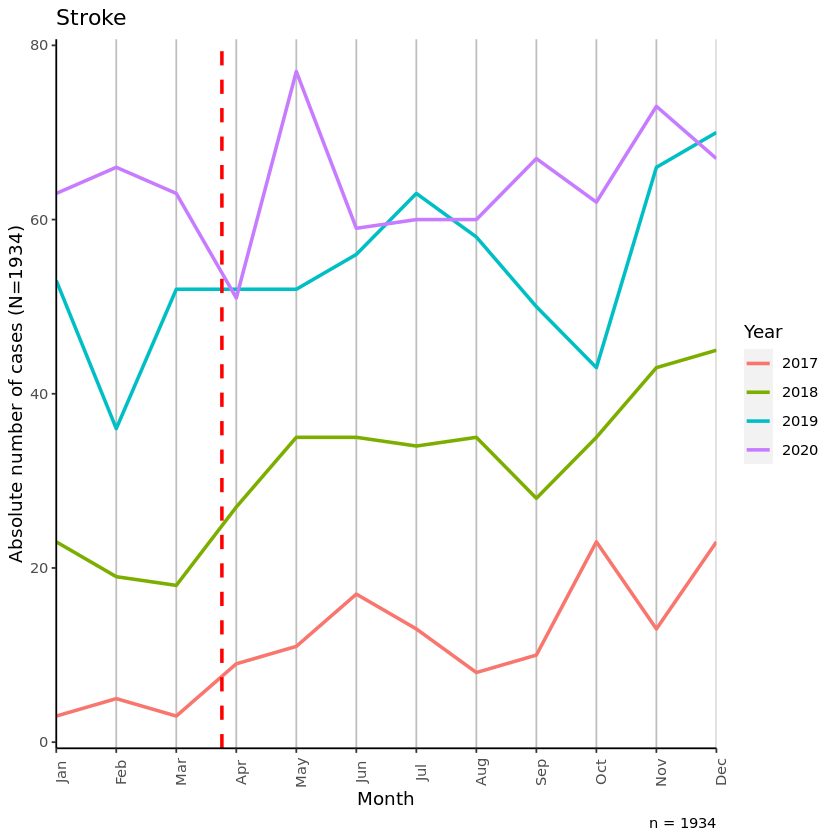

In [22]:
#############################################################################
#                             total_stroke                                    #
#############################################################################
p1<-ggplot(summary_table, aes(x=month, y=total_stroke, color = as.factor(year))) +
geom_line(size = 1) +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
geom_vline(xintercept = 3.76, color = "red", linetype = 2, size = 1) +
labs(caption = paste0("n = ", sum(summary_table$total_stroke)),
title = "Stroke",
color = "Year") +
ylab(paste0("Absolute number of cases (N=", sum(summary_table$total_stroke),")")) +
scale_x_continuous(name = "Month", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)

In [23]:
highest_socecon_lvl <- max(df$socecon_lvl_cd)
highest_socecon_lvl <- `highest_socecon_lvl`

`geom_smooth()` using formula 'y ~ x'



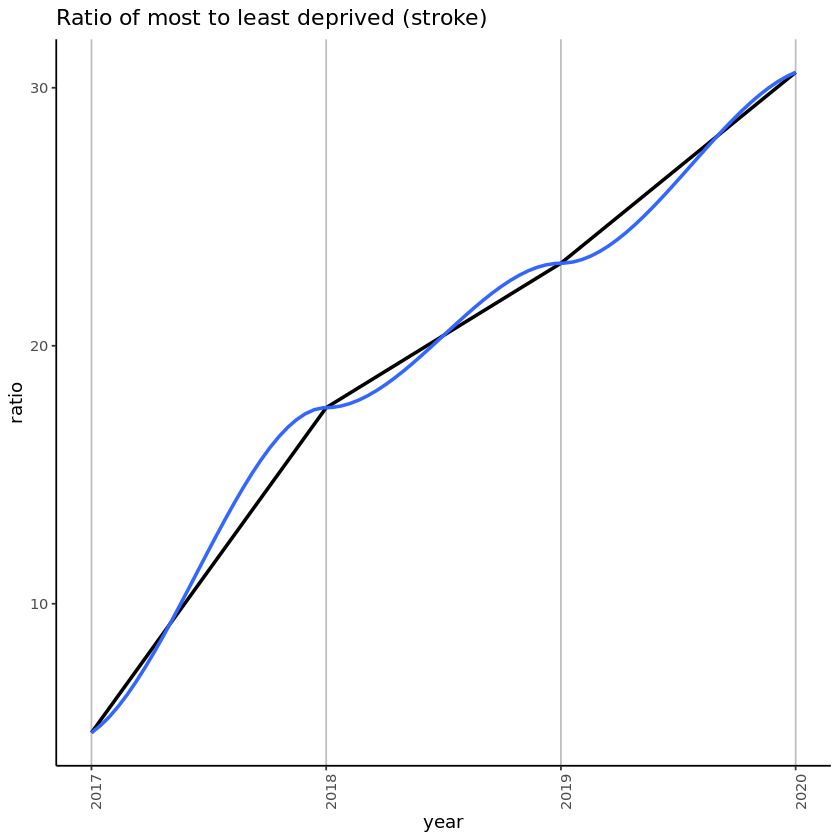

In [24]:
p1 <-
cohort1 %>% filter(!is.na(date_event_stroke), date_event_stroke >= date_from, date_event_stroke <= date_to) %>%
mutate(month = month(date_event_stroke), year = year(date_event_stroke)) %>%
group_by(year) %>%
count(socecon_lvl_cd) %>%
pivot_wider(id_cols = year, names_from = socecon_lvl_cd, values_from = n) %>%
mutate(ratio = `1` / highest_socecon_lvl) %>% filter(!is.na(ratio)) %>%
ggplot(aes(x=year, y=ratio)) +
geom_line(size=1) +
geom_smooth(method = "loess") +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title = "Ratio of most to least deprived (stroke)",
color = "Year") +
# scale_x_continuous(name = "Year", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)

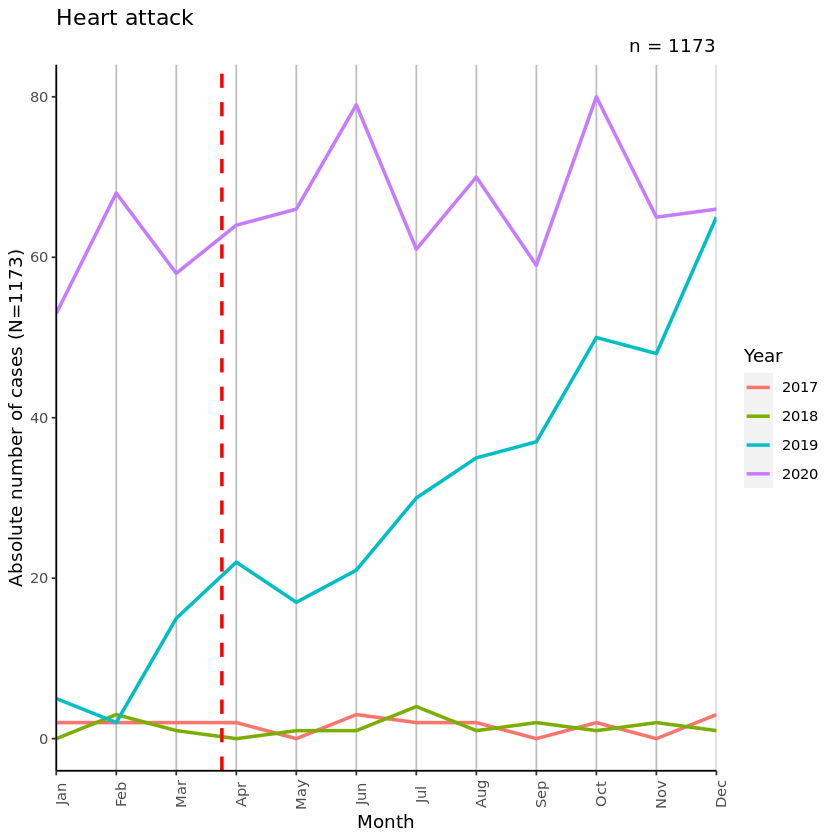

In [25]:
p1<-ggplot(summary_table, aes(x=month, y=total_heart_attack, color = as.factor(year))) +
geom_line(size = 1) +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
geom_vline(xintercept = 3.76, color = "red", linetype = 2, size = 1) +
labs(subtitle = paste0("n = ", sum(summary_table$total_heart_attack)),
title = "Heart attack",
color = "Year") +
ylab(paste0("Absolute number of cases (N=", sum(summary_table$total_heart_attack),")")) +
scale_x_continuous(name = "Month", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)

`geom_smooth()` using formula 'y ~ x'



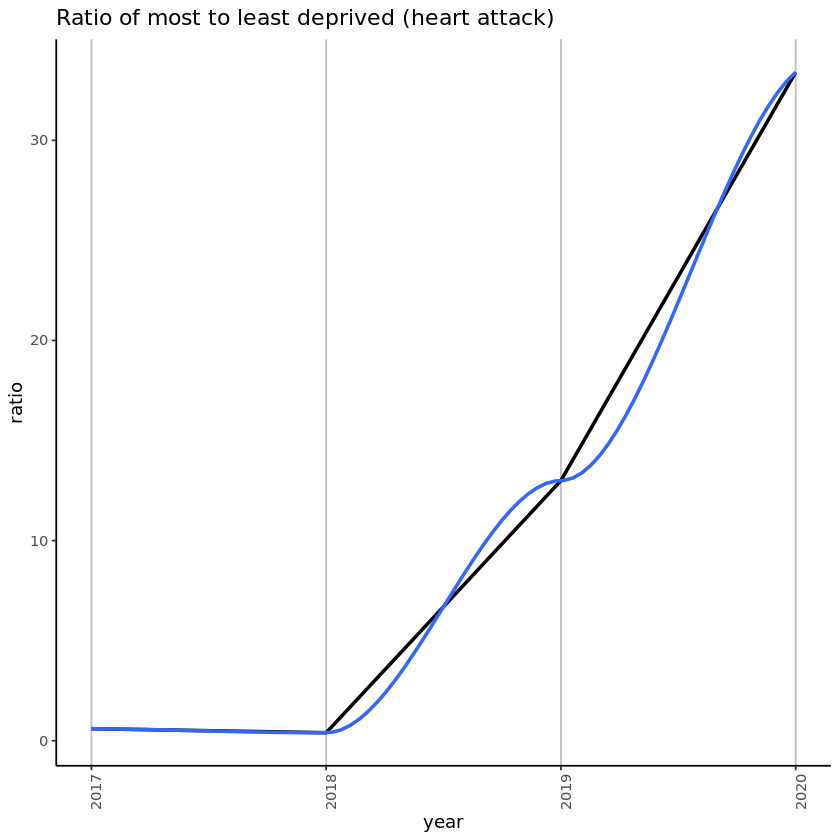

In [26]:
p1 <-
cohort1 %>% filter(!is.na(date_event_heart), date_event_heart >= date_from, date_event_heart <= date_to) %>%
mutate(month = month(date_event_heart), year = year(date_event_heart)) %>%
group_by(year) %>%
count(socecon_lvl_cd) %>%
pivot_wider(id_cols = year, names_from = socecon_lvl_cd, values_from = n) %>%
mutate(ratio = `1` / highest_socecon_lvl) %>% filter(!is.na(ratio)) %>%
ggplot(aes(x=year, y=ratio)) +
geom_line(size=1) +
geom_smooth(method = "loess") +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title = "Ratio of most to least deprived (heart attack)",
color = "Year") +
# scale_x_continuous(name = "Year", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)


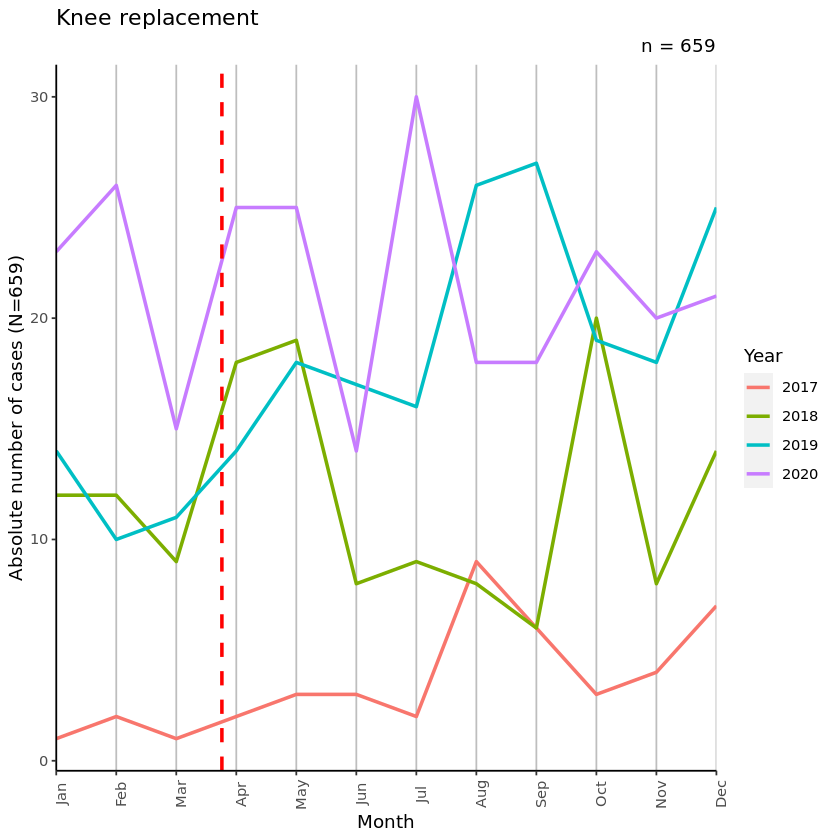

In [27]:
p1<-ggplot(summary_table, aes(x=month, y=total_knee_replacement, color = as.factor(year))) +
geom_line(size = 1) +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
geom_vline(xintercept = 3.76, color = "red", linetype = 2, size = 1) +
labs(subtitle = paste0("n = ", sum(summary_table$total_knee_replacement)),
title = "Knee replacement",
color = "Year") +
ylab(paste0("Absolute number of cases (N=", sum(summary_table$total_knee_replacement),")")) +
scale_x_continuous(name = "Month", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)

`geom_smooth()` using formula 'y ~ x'



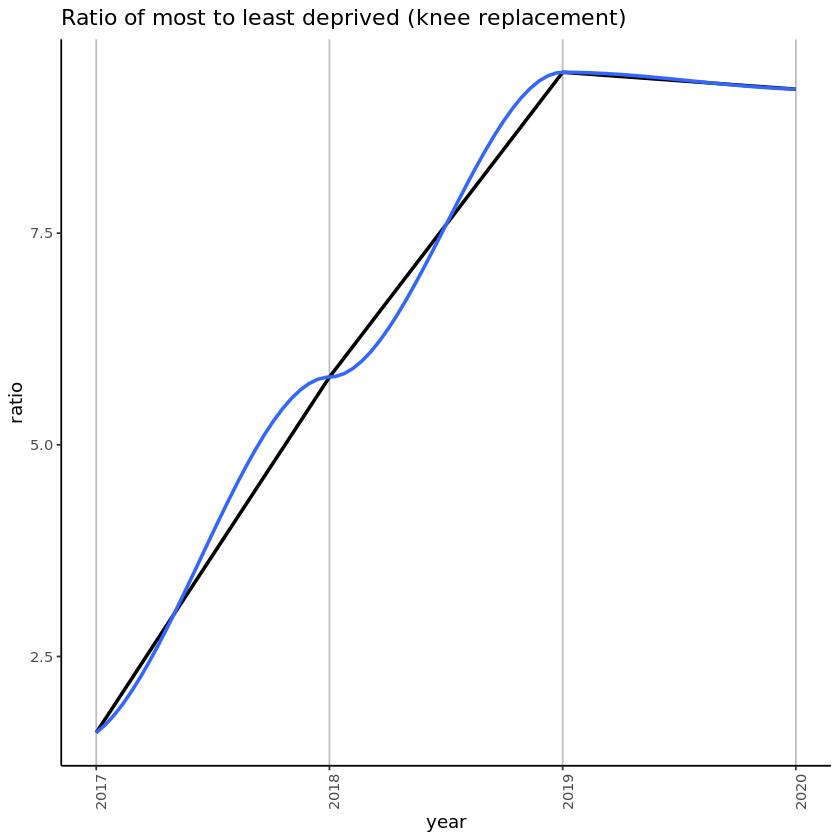

In [28]:
p1 <-
cohort2 %>% filter(!is.na(surgery_elective_knee), date_event >= date_from, date_event <= date_to)  %>%
mutate(month = month(date_event), year = year(date_event)) %>%
group_by(year) %>%
count(socecon_lvl_cd) %>%
pivot_wider(id_cols = year, names_from = socecon_lvl_cd, values_from = n) %>%
mutate(ratio = `1` / highest_socecon_lvl) %>% filter(!is.na(ratio)) %>%
ggplot(aes(x=year, y=ratio)) +
geom_line(size=1) +
geom_smooth(method = "loess") +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title = "Ratio of most to least deprived (knee replacement)",
color = "Year") +
# scale_x_continuous(name = "Year", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)


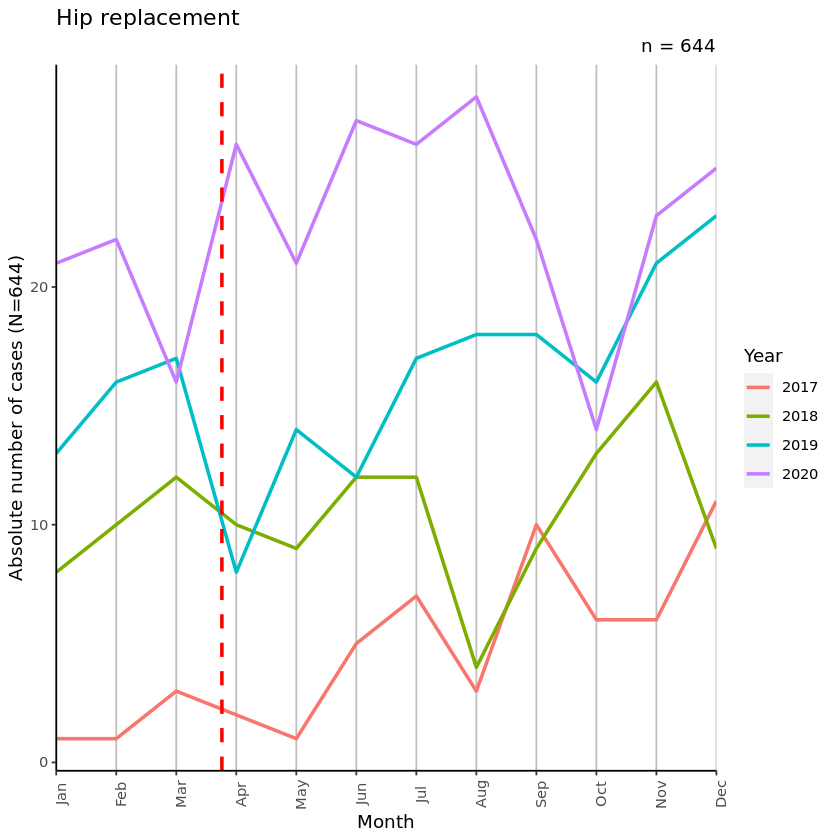

In [29]:
p1<-ggplot(summary_table, aes(x=month, y=total_hip_replacement, color = as.factor(year))) +
geom_line(size = 1) +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
geom_vline(xintercept = 3.76, color = "red", linetype = 2, size = 1) +
labs(subtitle = paste0("n = ", sum(summary_table$total_hip_replacement)),
title = "Hip replacement",
color = "Year") +
ylab(paste0("Absolute number of cases (N=", sum(summary_table$total_hip_replacement),")")) +
scale_x_continuous(name = "Month", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)

`geom_smooth()` using formula 'y ~ x'



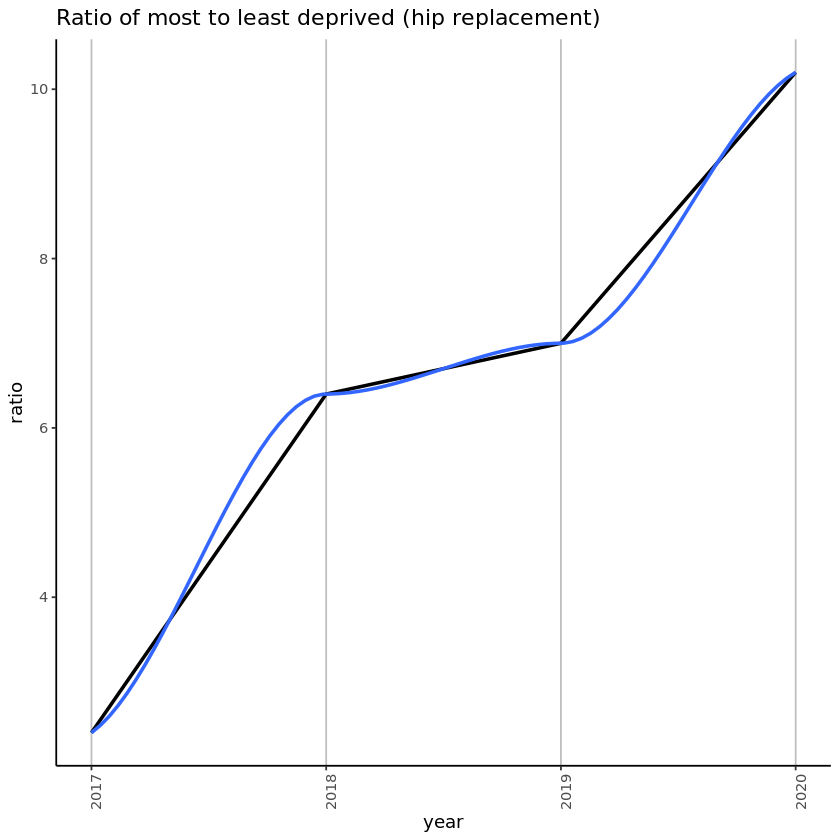

In [30]:
p1 <-
cohort2 %>% filter(!is.na(surgery_elective_hip), date_event >= date_from, date_event <= date_to)  %>%
mutate(month = month(date_event), year = year(date_event)) %>%
group_by(year) %>%
count(socecon_lvl_cd) %>%
pivot_wider(id_cols = year, names_from = socecon_lvl_cd, values_from = n) %>%
mutate(ratio = `1` / highest_socecon_lvl) %>% filter(!is.na(ratio)) %>%
ggplot(aes(x=year, y=ratio)) +
geom_line(size=1) +
geom_smooth(method = "loess") +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title = "Ratio of most to least deprived (hip replacement)",
color = "Year") +
# scale_x_continuous(name = "Year", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)



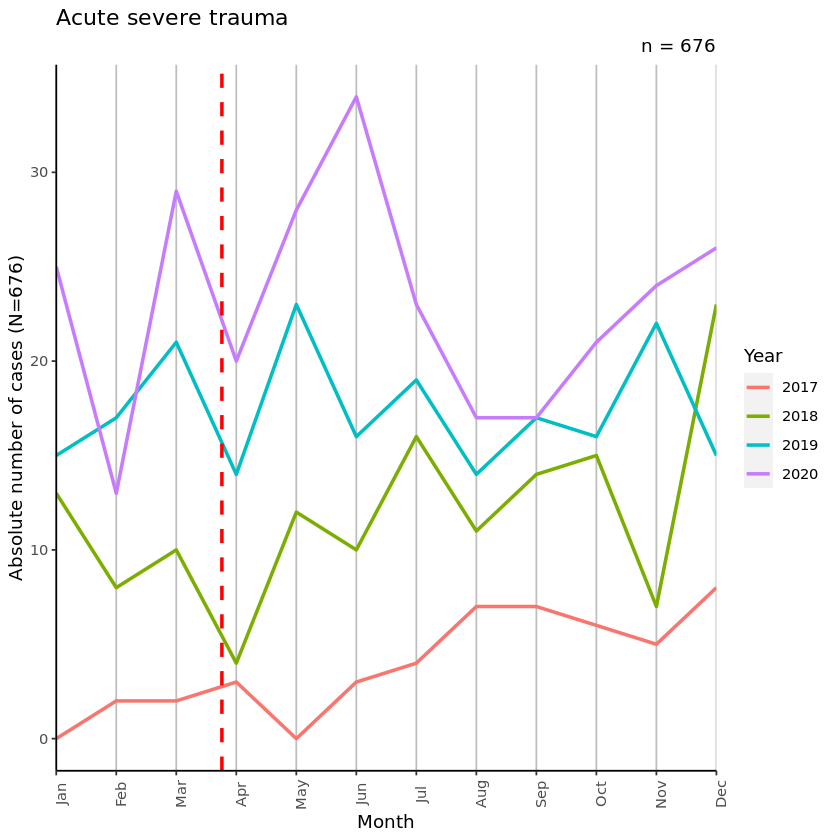

In [31]:
p1<-ggplot(summary_table, aes(x=month, y=total_acute_trauma, color = as.factor(year))) +
geom_line(size = 1) +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
geom_vline(xintercept = 3.76, color = "red", linetype = 2, size = 1) +
labs(subtitle = paste0("n = ", sum(summary_table$total_acute_trauma)),
title = "Acute severe trauma",
color = "Year") +
ylab(paste0("Absolute number of cases (N=", sum(summary_table$total_acute_trauma),")")) +
scale_x_continuous(name = "Month", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)

`geom_smooth()` using formula 'y ~ x'



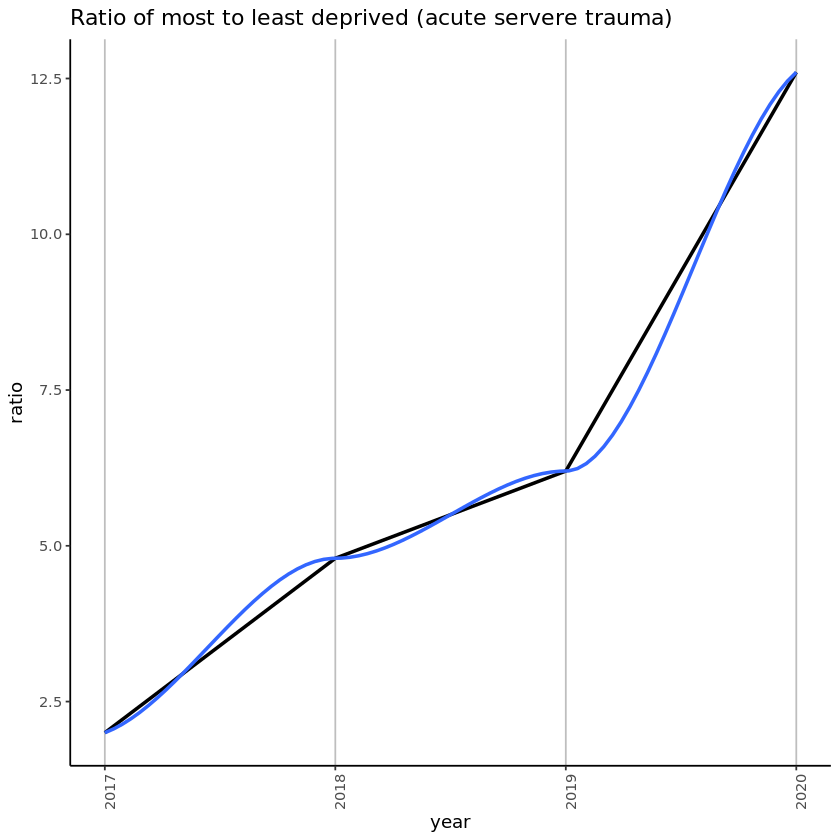

In [32]:
p1 <-
cohort3 %>% filter(date_event >= date_from, date_event <= date_to) %>%
mutate(month = month(date_event), year = year(date_event))  %>%
group_by(year) %>%
count(socecon_lvl_cd) %>%
pivot_wider(id_cols = year, names_from = socecon_lvl_cd, values_from = n) %>%
mutate(ratio = `1` / highest_socecon_lvl) %>% filter(!is.na(ratio)) %>%
ggplot(aes(x=year, y=ratio)) +
geom_line(size=1) +
geom_smooth(method = "loess") +
theme(panel.grid.major.x = element_line( color = "grey"),
panel.grid.major.y = element_blank(), panel.border = element_blank(),
panel.grid.minor = element_blank(), panel.background = element_blank(),
axis.line = element_line(color = "black")) +
theme(axis.text.x = element_text(angle = 90)) +
labs(title = "Ratio of most to least deprived (acute servere trauma)",
color = "Year") +
# scale_x_continuous(name = "Year", breaks = month_breaks[1:12], labels = month_names, expand = c(0,0)) +
theme(plot.subtitle = element_text(hjust = 1), plot.caption = element_text(hjust = 1))

ggplotly(p1)


### Summary table with total monthly cases by indicator ###

In [43]:
datatable(summary_table, class = 'cell-border stripe')

HTML widgets cannot be represented in plain text (need html)

In [ ]:
write.csv(summary_table_aggregated, file = "aggregated_outputs.csv", row.names = FALSE)